# COURSE: PCA and multivariate neural signal processing
## SECTION: Dimension reduction with PCA
### VIDEO: PCA intuition with scatter plots and covariance surfaces
#### Instructor: sincxpress.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
## PCA on simulated data

# data
x = np.random.randn(1000,2)
x[:,1] = .4*x[:,1]

# rotation matrix
th = np.pi/4 # theta
R1 = [ [np.cos(th),-np.sin(th)], [np.sin(th),np.cos(th)] ]

# rotate data to induce correlation
y = x@R1

# PCA of y (correlated data)
for i in range(2):
    y[:,i] -= np.mean( y[:,i] )

covmat = y.T@y / (len(y)-1)
evals,evecs = np.linalg.eig(covmat)


In [38]:
## compute quadratic form

# weights along each dimension
xi = np.arange(-2,2,.1)

quadform = np.zeros( (len(xi),len(xi)) )
for i in range(len(xi)):
    for j in range(len(xi)):
        # define vector
        x = np.array([ xi[i],xi[j] ])
        
        # QF
        quadform[i,j] = x.T@covmat@x / (x.T@x)

# fill in missing point with 0
quadform[~np.isfinite(quadform)] = 0


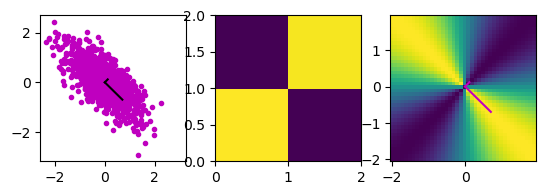

In [39]:
## lots o' plotting


# plot the data in a scatter plot
plt.subplot(131)
plt.plot(y[:,0],y[:,1],'m.')
plt.axis('square')

# plot the eigenvectors
plt.plot([0,evecs[0,0]*evals[0]],[0,evecs[1,0]*evals[0]],'k')
plt.plot([0,evecs[0,1]*evals[1]],[0,evecs[1,1]*evals[1]],'k')



# show an image of the covariance matrix
plt.subplot(132)
plt.pcolor(covmat)
plt.axis('square')



# show the quadratic surface
plt.subplot(133)
plt.pcolor(xi,xi,quadform.T)

# and the eigenvectors
plt.plot([0,evecs[0,0]*evals[0]],[0,evecs[1,0]*evals[0]],'m')
plt.plot([0,evecs[0,1]*evals[1]],[0,evecs[1,1]*evals[1]],'m')
plt.axis('square')

plt.show()